In [1]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils.generate_phrases import generate_random_phrase, generate_random_phrase_with_mutation, alphabet

In [3]:
def generate_phrases(phrase, u=0.1, gen_max=1e7):
    for letter in phrase:
        if letter not in alphabet:
            raise ValueError(f"Letter {letter} not in alphabet")
    
    phrase_size = len(phrase)
    gen = 0
    initial_phrase = generate_random_phrase(phrase_size, alphabet)
    new_phrase = initial_phrase
    reached = False
    while True:
        if new_phrase == phrase:
            reached = True

        if new_phrase == phrase or gen >= gen_max:
            break
        new_phrase = generate_random_phrase_with_mutation(new_phrase, alphabet=alphabet, u=u)
        gen += 1
    return initial_phrase, {"gen": gen, "reached": reached}


In [9]:
def plot_graphs_and_describe(full_gens, u_list):
    d = {}

    for i in range(len(full_gens)):
        d[f"U{u_list[i]}"] = full_gens[i]

    df = pd.DataFrame(d)

    print(df.describe())

    df.boxplot()
    plt.xticks(rotation=45)
    plt.show()

def run_exp(u_list, phrase, qntd_exp, gen_max=1e7):
    print("Generating phrases for different mutation rates: \n", u_list)
    med_gens = []
    full_gens = []
    t1 = time.time()
    for u in u_list:
        gens = []
        t1_epoch = time.time()
        for i in range(qntd_exp):
            initial_phrase, gen = generate_phrases(phrase, u, gen_max=gen_max)
            gens.append(gen.get("gen"))
            if not gen.get("reached"):
                print(f"This experiment {i} did not reach the phrase")
        t2_epoch = time.time()
        print(f"Mutation rate: {u:.2f} | Mean generations: {round(np.mean(gens), 2):,} | Time taken: {t2_epoch-t1_epoch:.2f}s")

        med_gens.append(np.mean(gens))
        full_gens.append(gens)
    t2 = time.time()
    print("Mean generations: ", med_gens)
    print("Time taken: ", t2-t1)

    plt.plot(u_list, med_gens)
    plt.plot(u_list, med_gens, '*')
    plt.ylabel("Mean generations")
    plt.xlabel("Mutation rate")
    plt.show()

    plot_graphs_and_describe(full_gens, u_list)

Took 397 generations to generate the phrase 'GAGCCC' from 'GGAACA'
Took 1,346 generations to generate the phrase 'GAGCCC' from 'CGAACA'
Took 149 generations to generate the phrase 'GAGCCC' from 'ACGTCT'
Took 4,776 generations to generate the phrase 'GAGCCC' from 'GCTTCA'
Took 2,140 generations to generate the phrase 'GAGCCC' from 'AGTTCG'
Took 3,536 generations to generate the phrase 'GAGCCC' from 'TCCACG'
Took 2,653 generations to generate the phrase 'GAGCCC' from 'TAAGTT'
Took 54 generations to generate the phrase 'GAGCCC' from 'ACACAT'
Took 3,188 generations to generate the phrase 'GAGCCC' from 'TTTCCT'
Took 822 generations to generate the phrase 'GAGCCC' from 'TACTGT'
Took 3,717 generations to generate the phrase 'GAGCCC' from 'CCGGTT'
Took 2,722 generations to generate the phrase 'GAGCCC' from 'CCACCC'
Took 342 generations to generate the phrase 'GAGCCC' from 'GATACT'
Took 5,085 generations to generate the phrase 'GAGCCC' from 'AGTCCA'
Took 231 generations to generate the phrase '

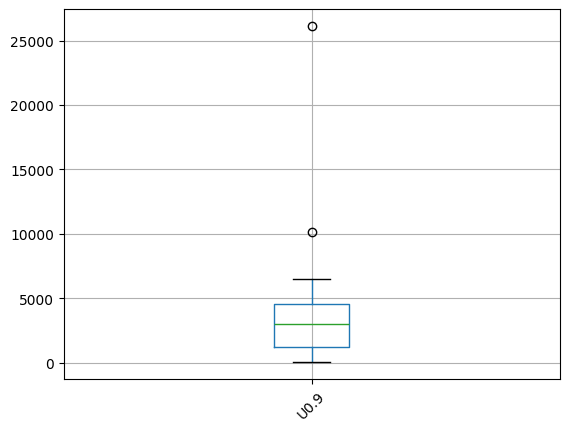

In [5]:
phrase = 'GAGCCC'#TCAATCAGGCATACC'
u = 0.9
size_exp = 30

gens_list = []
for i in range(size_exp):
    initial_phrase, gen = generate_phrases(phrase, u, 1e6)
    gens_list.append(gen.get("gen"))

    print(f"Took {gen.get('gen'):,} generations to generate the phrase '{phrase}' from '{initial_phrase}'")

plot_graphs_and_describe([gens_list], [u])

## Variar o valor de u: 0 a 1, incrementos de 0.001(?)

- Relação entre u e o número médio de gerações necessário para se encontrar o alvo (N médio)
- Há um valor ótimo para u?

## Gráficos

- u por MED(N)
- u port L por MED(N) (Se variar L)

Generating phrases for different mutation rates: 
 [0.001, 0.051000000000000004, 0.101, 0.15100000000000002, 0.201, 0.251, 0.30100000000000005, 0.35100000000000003, 0.401, 0.451, 0.501, 0.551, 0.6010000000000001, 0.651, 0.7010000000000001, 0.751, 0.801, 0.8510000000000001, 0.901, 0.9510000000000001]
This experiment 0 did not reach the phrase
This experiment 1 did not reach the phrase
This experiment 2 did not reach the phrase
This experiment 3 did not reach the phrase
This experiment 4 did not reach the phrase
This experiment 5 did not reach the phrase
This experiment 6 did not reach the phrase
This experiment 7 did not reach the phrase
This experiment 9 did not reach the phrase
This experiment 11 did not reach the phrase
This experiment 12 did not reach the phrase
This experiment 13 did not reach the phrase
This experiment 14 did not reach the phrase
This experiment 15 did not reach the phrase
This experiment 16 did not reach the phrase
This experiment 17 did not reach the phrase
This

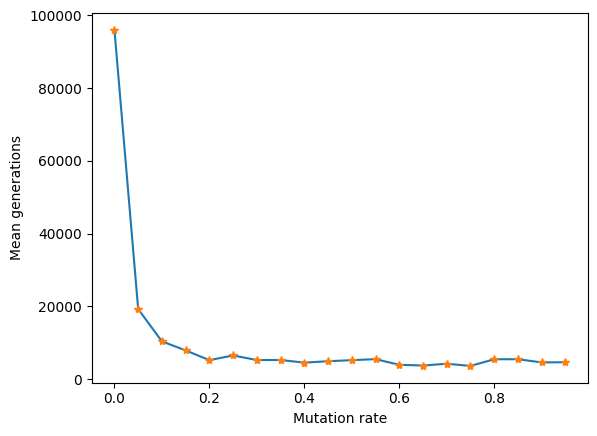

              U0.001  U0.051000000000000004        U0.101  \
count      30.000000              30.000000     30.000000   
mean    96021.766667           19241.000000  10350.033333   
std     17702.154655           19312.487388   8753.728579   
min      5394.000000             270.000000    151.000000   
25%    100000.000000            6922.250000   4641.750000   
50%    100000.000000           10954.000000   7926.000000   
75%    100000.000000           25107.000000  12337.500000   
max    100000.000000           65345.000000  37953.000000   

       U0.15100000000000002        U0.201        U0.251  U0.30100000000000005  \
count             30.000000     30.000000     30.000000             30.000000   
mean            7872.633333   5189.633333   6479.766667           5219.733333   
std             7632.994421   4390.627270   4657.849057           4553.867897   
min              383.000000    105.000000    326.000000            422.000000   
25%             2896.750000   1653.750000   2

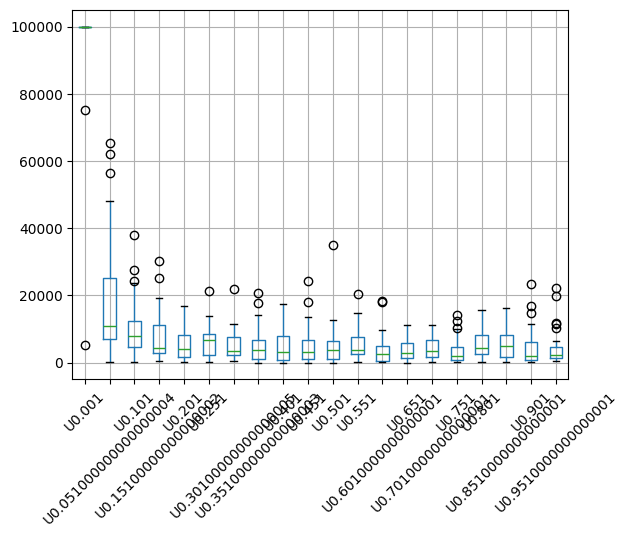

In [11]:
phrase = 'GAGCCC'#TCAATCAGGCATACC'
qntd_exp = 30
step = 0.05
u_list = list(np.arange(0.001, 1, step))

run_exp(u_list, phrase, qntd_exp, 1e5)

Generating phrases for different mutation rates: 
 [0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.5800000000000001, 0.5900000000000001, 0.6000000000000001, 0.6100000000000001, 0.6200000000000001, 0.6300000000000001, 0.6400000000000001, 0.6500000000000001, 0.6600000000000001, 0.6700000000000002, 0.6800000000000002, 0.6900000000000002, 0.7000000000000002, 0.7100000000000002, 0.7200000000000002, 0.7300000000000002, 0.7400000000000002, 0.7500000000000002, 0.7600000000000002, 0.7700000000000002, 0.7800000000000002, 0.7900000000000003, 0.8000000000000003, 0.8100000000000003, 0.8200000000000003, 0.8300000000000003, 0.8400000000000003, 0.8500000000000003, 0.8600000000000003, 0.8700000000000003, 0.8800000000000003, 0.8900000000000003, 0.9000000000000004, 0.9100000000000004, 0.9200000000000004, 0.9300000000000004, 0.9400000000000004, 0.9500000000000004, 0.9600000000000004, 0.9700000000000004, 0.9800000000000004, 0.9900000000000004]
Mutation rate: 0.50 | Mean generations: 4,130.1

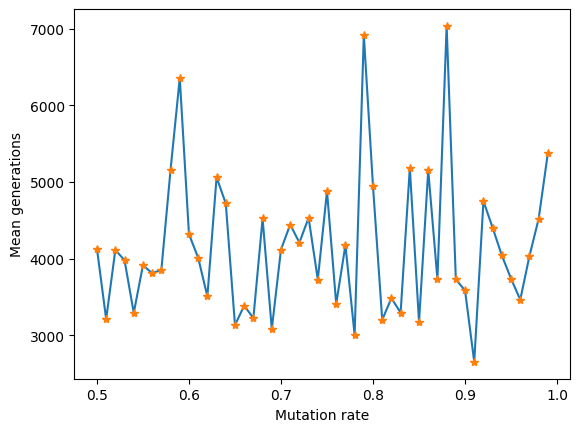

               U0.5         U0.51         U0.52         U0.53        U0.54  \
count     30.000000     30.000000     30.000000     30.000000    30.000000   
mean    4130.133333   3209.566667   4113.433333   3977.500000  3290.200000   
std     4465.524819   2943.894883   3751.755485   3558.258124  2276.875678   
min        3.000000     69.000000    640.000000     82.000000   267.000000   
25%      733.500000   1356.250000   1497.750000   1512.500000  1554.750000   
50%     2389.500000   2067.000000   3017.500000   2871.000000  3069.500000   
75%     6156.000000   4431.500000   4993.750000   4842.500000  4635.000000   
max    17556.000000  13845.000000  13511.000000  13353.000000  8932.000000   

              U0.55         U0.56  U0.5700000000000001  U0.5800000000000001  \
count     30.000000     30.000000            30.000000            30.000000   
mean    3914.133333   3808.666667          3853.366667          5161.266667   
std     4311.172724   3439.494593          3906.750899      

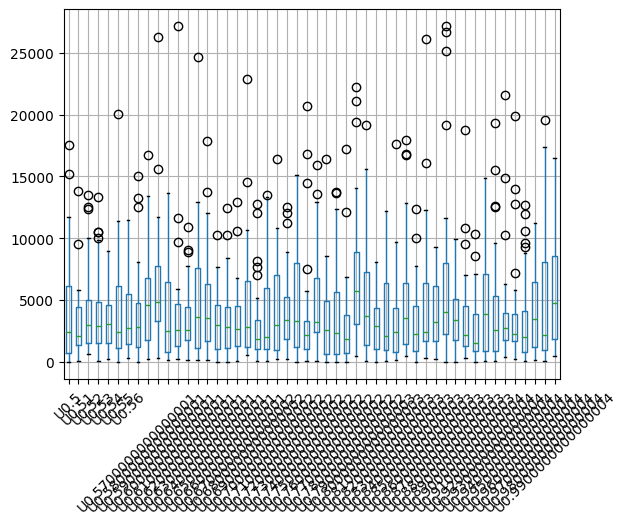

In [7]:
phrase = 'GAGCCC'#TCAATCAGGCATACC'
qntd_exp = 30
step = 0.01
u_list = list(np.arange(0.5, 1, step))

run_exp(u_list, phrase, qntd_exp)

Generating phrases for different mutation rates: 
 [0.8, 0.801, 0.802, 0.803, 0.804, 0.805, 0.806, 0.807, 0.808, 0.809, 0.81, 0.811, 0.812, 0.8130000000000001, 0.8140000000000001, 0.8150000000000001, 0.8160000000000001, 0.8170000000000001, 0.8180000000000001, 0.8190000000000001, 0.8200000000000001, 0.8210000000000001, 0.8220000000000001, 0.8230000000000001, 0.8240000000000001, 0.8250000000000001, 0.8260000000000001, 0.8270000000000001, 0.8280000000000001, 0.8290000000000001, 0.8300000000000001, 0.8310000000000001, 0.8320000000000001, 0.8330000000000001, 0.8340000000000001, 0.8350000000000001, 0.8360000000000001, 0.8370000000000001, 0.8380000000000001, 0.8390000000000001, 0.8400000000000001, 0.8410000000000001, 0.8420000000000001, 0.8430000000000001, 0.8440000000000001, 0.8450000000000001, 0.8460000000000001, 0.8470000000000001, 0.8480000000000001, 0.8490000000000001, 0.8500000000000001, 0.8510000000000001, 0.8520000000000001, 0.8530000000000001, 0.8540000000000001, 0.8550000000000001, 

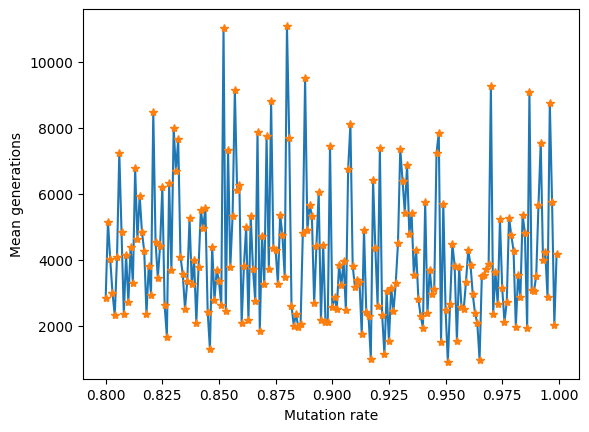

               U0.8        U0.801        U0.802       U0.803       U0.804  \
count      5.000000      5.000000      5.000000     5.000000     5.000000   
mean    2853.200000   5155.000000   4016.800000  2995.000000  2317.600000   
std     5445.101533   4797.515763   4041.730904  3873.963926  1297.553968   
min       11.000000   1717.000000   1083.000000    55.000000   865.000000   
25%      158.000000   2002.000000   1486.000000   604.000000  1005.000000   
50%      535.000000   2762.000000   1607.000000  1485.000000  2822.000000   
75%      992.000000   6167.000000   5354.000000  3254.000000  3234.000000   
max    12570.000000  13127.000000  10554.000000  9577.000000  3662.000000   

            U0.805        U0.806        U0.807       U0.808       U0.809  ...  \
count     5.000000      5.000000      5.000000     5.000000     5.000000  ...   
mean   4089.000000   7243.600000   4831.400000  2360.200000  4159.600000  ...   
std    3059.528313   6466.727016   7574.876982  1453.471087  35

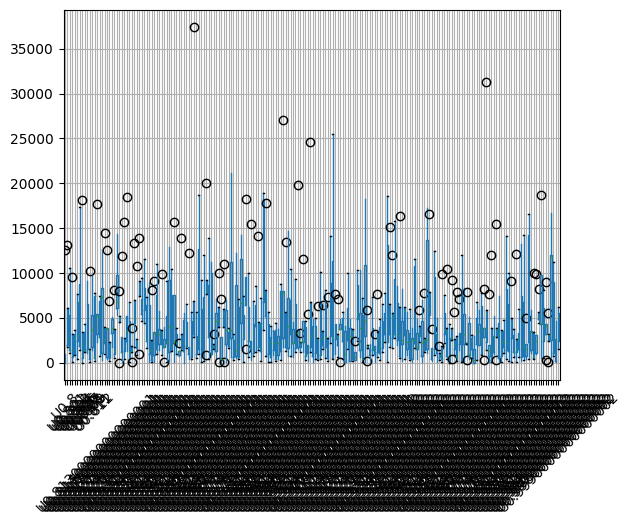

In [6]:
phrase = 'GAGCCC'#TCAATCAGGCATACC'
qntd_exp = 5
step = 0.001
u_list = list(np.arange(0.8, 1, step))

run_exp(u_list, phrase, qntd_exp)